# Training with various utilities

In [1]:
from utils import *
from training import *
from policies import *
from envs import *
import warnings
warnings.filterwarnings("ignore")

LLu_dict = {}
ui = 0
LLu = []
for i in trange(10):
    policy =MLP_thin()
    optimizer = optim.Adam(policy.parameters(), lr=0.05)
    L,Lu,Lx,Lcpt,_ = train(policy, optimizer, env=GridWorld(),num_episodes=100, batch_size= 100,changing_entropy=False, draw_phi=False,action_direct=False,draw_policy=False,adaptive_baseline=False,random_start=True,log_interval=1, changing_alpha=False, w=wp_three_segments,return_best=False)
    LLu.append(Lu)
LLu_dict[ui] = LLu


ui = 1
utility = lambda x :4*(1-exp(-0.2*x))
LLu = []
for i in trange(10):
    policy =MLP_thin()
    optimizer = optim.Adam(policy.parameters(), lr=0.05)
    L,Lu,Lx,Lcpt,_ = train(policy, optimizer, env=GridWorld(),utility=utility,num_episodes=100, batch_size= 100,changing_entropy=False, draw_phi=False,action_direct=False,draw_policy=False,adaptive_baseline=False,random_start=True,log_interval=1, changing_alpha=False, w=wp_three_segments,return_best=False)
    LLu.append(Lu)
LLu_dict[ui] = LLu

ui = 2
utility = lambda x :exp(0.2*x)
LLu = []
for i in trange(10):
    policy =MLP_thin()
    optimizer = optim.Adam(policy.parameters(), lr=0.05)
    L,Lu,Lx,Lcpt,_ = train(policy, optimizer, env=GridWorld(),utility=utility,num_episodes=100, batch_size= 100,changing_entropy=False, draw_phi=False,action_direct=False,draw_policy=False,adaptive_baseline=False,random_start=True,log_interval=1, changing_alpha=False, w=wp_three_segments,return_best=False)
    LLu.append(Lu)
LLu_dict[ui] = LLu

ui = 3
utility = KT()
LLu = []
for i in trange(10):
    policy =MLP_thin()
    optimizer = optim.Adam(policy.parameters(), lr=0.05)
    L,Lu,Lx,Lcpt,_ = train(policy, optimizer, env=GridWorld(),utility=utility,num_episodes=100, batch_size= 100,changing_entropy=False, draw_phi=False,action_direct=False,draw_policy=False,adaptive_baseline=False,random_start=True,log_interval=1, changing_alpha=False, w=wp_three_segments,return_best=False)
    LLu.append(Lu)
LLu_dict[ui] = LLu

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [07:35<00:00, 45.53s/it]


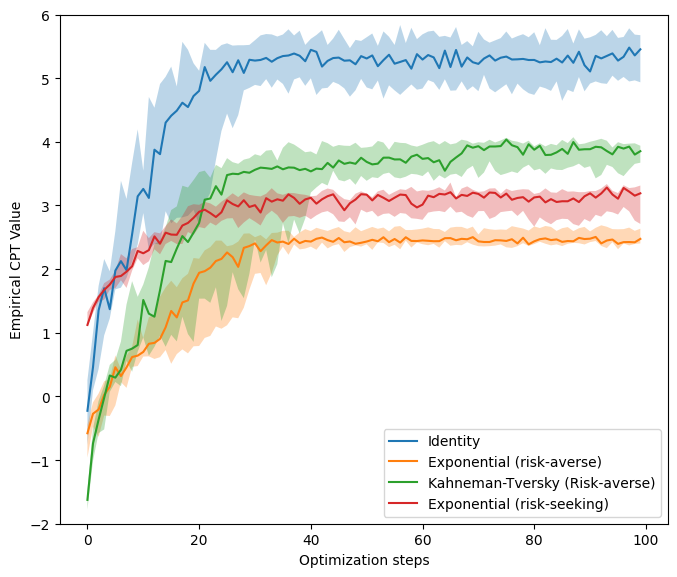

In [2]:
# Example data
x = np.linspace(0, 10, 100)

# Create a single plot
fig, ax = plt.subplots(figsize=(7, 6))


for i,name in zip([0, 1, 3,2],["Identity", "Exponential (risk-averse)","Kahneman-Tversky (Risk-averse)","Exponential (risk-seeking)"]):
    runs = LLu_dict[i]  
    mean_performance = np.median(runs, axis=0)
    q1_performance = np.percentile(runs, 25, axis=0)
    q3_performance = np.percentile(runs, 75, axis=0)
    steps = np.arange(len(runs[0])) 
    ax.plot(steps, mean_performance, label=name)
    ax.fill_between(steps, q1_performance, q3_performance,  alpha=0.3)



ax.set_xlabel('Optimization steps')
ax.set_ylabel('Empirical CPT Value')
ax.legend()
plt.rcParams.update({'font.size': 14})
# Show the plot
plt.ylim(-2,6)
plt.tight_layout()
plt.show()